# Synthetic Data Generation Using RAGAS - RAG Evaluation with LangSmith

In the following notebook we'll explore a use-case for RAGAS' synthetic testset generation workflow!



- 🤝 BREAKOUT ROOM #1
  1. Use RAGAS to Generate Synthetic Data

- 🤝 BREAKOUT ROOM #2
  1. Load them into a LangSmith Dataset
  2. Evaluate our RAG chain against the synthetic test data
  3. Make changes to our pipeline
  4. Evaluate the modified pipeline

SDG is a critical piece of the puzzle, especially for early iteration! Without it, it would not be nearly as easy to get high quality early signal for our application's performance.

Let's dive in!

# 🤝 BREAKOUT ROOM #1

## Task 1: Dependencies and API Keys

We'll need to install a number of API keys and dependencies, since we'll be leveraging a number of great technologies for this pipeline!

1. OpenAI's endpoints to handle the Synthetic Data Generation
2. OpenAI's Endpoints for our RAG pipeline and LangSmith evaluation
3. QDrant as our vectorstore
4. LangSmith for our evaluation coordinator!

Let's install and provide all the required information below!

## Dependencies and API Keys:

> NOTE: DO NOT RUN THESE CELLS IF YOU ARE RUNNING THIS NOTEBOOK LOCALLY

In [ ]:
!pip install -qU ragas==0.2.10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.7/175.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/19

In [ ]:
!pip install -qU langchain-community==0.3.14 langchain-openai==0.2.14 unstructured==0.16.12 langgraph==0.2.61 langchain-qdrant==0.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.6/306.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━

In [ ]:
import os
import getpass

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass("LangChain API Key:")

LangChain API Key:··········


We'll also want to set a project name to make things easier for ourselves.

In [ ]:
from uuid import uuid4

os.environ["LANGCHAIN_PROJECT"] = f"AIM - SDG - {uuid4().hex[0:8]}"

OpenAI's API Key!

In [ ]:
os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

OpenAI API Key:··········


## Generating Synthetic Test Data

We wil be using Ragas to build out a set of synthetic test questions, references, and reference contexts. This is useful because it will allow us to find out how our system is performing.

> NOTE: Ragas is best suited for finding *directional* changes in your LLM-based systems. The absolute scores aren't comparable in a vacuum.

### Data Preparation

We'll prepare our data - and download our webpages which we'll be using for our data today.

These webpages are from [Simon Willison's](https://simonwillison.net/) yearly "AI learnings".

- [2023 Blog](https://simonwillison.net/2023/Dec/31/ai-in-2023/)
- [2024 Blog](https://simonwillison.net/2024/Dec/31/llms-in-2024/)

Let's start by collecting our data into a useful pile!

In [ ]:
!mkdir data


In [ ]:
!curl https://simonwillison.net/2023/Dec/31/ai-in-2023/ -o data/2023_llms.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31314    0 31314    0     0  69171      0 --:--:-- --:--:-- --:--:-- 69278


In [ ]:
!curl https://simonwillison.net/2024/Dec/31/llms-in-2024/ -o data/2024_llms.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70173    0 70173    0     0   390k      0 --:--:-- --:--:-- --:--:--  391k


Next, let's load our data into a familiar LangChain format using the `DirectoryLoader`.

In [ ]:
from langchain_community.document_loaders import DirectoryLoader

path = "data/"
loader = DirectoryLoader(path, glob="*.html")
docs = loader.load()

### Knowledge Graph Based Synthetic Generation

Ragas uses a knowledge graph based approach to create data. This is extremely useful as it allows us to create complex queries rather simply. The additional testset complexity allows us to evaluate larger problems more effectively, as systems tend to be very strong on simple evaluation tasks.

Let's start by defining our `generator_llm` (which will generate our questions, summaries, and more), and our `generator_embeddings` which will be useful in building our graph.

### Unrolled SDG

In [ ]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4o"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

Next, we're going to instantiate our Knowledge Graph.

This graph will contain N number of nodes that have M number of relationships. These nodes and relationships (AKA "edges") will define our knowledge graph and be used later to construct relevant questions and responses.

In [ ]:
from ragas.testset.graph import KnowledgeGraph

kg = KnowledgeGraph()
kg

KnowledgeGraph(nodes: 0, relationships: 0)

The first step we're going to take is to simply insert each of our full documents into the graph. This will provide a base that we can apply transformations to.

In [ ]:
from ragas.testset.graph import Node, NodeType

for doc in docs:
    kg.nodes.append(
        Node(
            type=NodeType.DOCUMENT,
            properties={"page_content": doc.page_content, "document_metadata": doc.metadata}
        )
    )
kg

KnowledgeGraph(nodes: 2, relationships: 0)

Now, we'll apply the *default* transformations to our knowledge graph. This will take the nodes currently on the graph and transform them based on a set of [default transformations](https://docs.ragas.io/en/latest/references/transforms/#ragas.testset.transforms.default_transforms).

These default transformations are dependent on the corpus length, in our case:

- Producing Summaries -> produces summaries of the documents
- Extracting Headlines -> finding the overall headline for the document
- Theme Extractor -> extracts broad themes about the documents

It then uses cosine-similarity and heuristics between the embeddings of the above transformations to construct relationships between the nodes.

In [ ]:
from ragas.testset.transforms import default_transforms, apply_transforms

transformer_llm = generator_llm
embedding_model = generator_embeddings

default_transforms = default_transforms(documents=docs, llm=transformer_llm, embedding_model=embedding_model)
apply_transforms(kg, default_transforms)
kg

Applying HeadlinesExtractor:   0%|          | 0/2 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/2 [00:00<?, ?it/s]

Applying SummaryExtractor:   0%|          | 0/2 [00:00<?, ?it/s]

Applying CustomNodeFilter:   0%|          | 0/12 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/26 [00:00<?, ?it/s]

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

KnowledgeGraph(nodes: 14, relationships: 68)

We can save and load our knowledge graphs as follows.

In [ ]:
kg.save("ai_across_years_kg.json")
ai_across_years_kg = KnowledgeGraph.load("ai_across_years_kg.json")
ai_across_years_kg

KnowledgeGraph(nodes: 14, relationships: 68)

Using our knowledge graph, we can construct a "test set generator" - which will allow us to create queries.

In [ ]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=embedding_model, knowledge_graph=ai_across_years_kg)

However, we'd like to be able to define the kinds of queries we're generating - which is made simple by Ragas having pre-created a number of different "QuerySynthesizer"s.

Each of these Synthetsizers is going to tackle a separate kind of query which will be generated from a scenario and a persona.

In essence, Ragas will use an LLM to generate a persona of someone who would interact with the data - and then use a scenario to construct a question from that data and persona.

In [ ]:
from ragas.testset.synthesizers import default_query_distribution, SingleHopSpecificQuerySynthesizer, MultiHopAbstractQuerySynthesizer, MultiHopSpecificQuerySynthesizer

query_distribution = [
        (SingleHopSpecificQuerySynthesizer(llm=generator_llm), 0.5),
        (MultiHopAbstractQuerySynthesizer(llm=generator_llm), 0.25),
        (MultiHopSpecificQuerySynthesizer(llm=generator_llm), 0.25),
]

#### ❓ Question #1:

What are the three types of query synthesizers doing? Describe each one in simple terms.


#### Answer:


1.   **SingleHopSpecificQuerySynthesizer**: Creates questions that can be answered by finding a single, specific piece of information within the provided context.
2.   **MultiHopAbstractQuerySynthesizer**: Creates complex questions that require combining information from multiple parts of the documents. These require understanding the bigger picture or abstract concepts.
3.   **MultiHopSpecificQuerySynthesizer**: This is similar to above abstract synthesizer that needs information from multiple parts of the documents. The questions here are focussed on finding specific details, rather than abstract concepts.



Finally, we can use our `TestSetGenerator` to generate our testset!

In [ ]:
testset = generator.generate(testset_size=10, query_distribution=query_distribution)
testset.to_pandas()

Generating personas:   0%|          | 0/2 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/11 [00:00<?, ?it/s]

,user_input,reference_contexts,reference,synthesizer_name
0,What advancements did Google introduce with th...,[Prompt driven app generation is a commodity a...,"Google's Gemini 1.5 Pro, released in February ...",single_hop_specifc_query_synthesizer
1,How does the California Academy of Sciences fe...,"[gets you OpenAI’s most expensive model, o1. G...",In the context of advancements in multi-modal ...,single_hop_specifc_query_synthesizer
2,What role does Anthropic play in the developme...,[feed with the model and talk about what you c...,Anthropic advanced the concept of interactive ...,single_hop_specifc_query_synthesizer
3,Cud yu pleese explane how Vercel's aproach to ...,[dependent on AGI itself. A model that’s robus...,Vercel's approach to prompt evaluations has ev...,single_hop_specifc_query_synthesizer
4,How does Claude 3.5 Sonnet compare to other la...,[that. DeepSeek v3 is a huge 685B parameter mo...,Claude 3.5 Sonnet is benchmarked alongside Dee...,single_hop_specifc_query_synthesizer
5,How has OpenAI contributed to the development ...,[<1-hop>\n\nGullibility is the biggest unsolve...,OpenAI has played a significant role in the de...,multi_hop_abstract_query_synthesizer
6,How has OpenAI contributed to the development ...,[<1-hop>\n\nGullibility is the biggest unsolve...,OpenAI has played a significant role in the de...,multi_hop_abstract_query_synthesizer
7,How has OpenAI's development of LLMs influence...,[<1-hop>\n\nGullibility is the biggest unsolve...,OpenAI's development of LLMs has significantly...,multi_hop_abstract_query_synthesizer
8,In the context of advancements in Large Langua...,[<1-hop>\n\nSimon Willison’s Weblog Subscribe ...,"In 2023, GPT-4 played a significant role in th...",multi_hop_specific_query_synthesizer
9,How has the development of large language mode...,[<1-hop>\n\nthat. DeepSeek v3 is a huge 685B p...,The development of large language models such ...,multi_hop_specific_query_synthesizer


### Abstracted SDG

The above method is the full process - but we can shortcut that using the provided abstractions!

This will generate our knowledge graph under the hood, and will - from there - generate our personas and scenarios to construct our queries.



In [ ]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(docs, testset_size=10)

Applying HeadlinesExtractor:   0%|          | 0/2 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/2 [00:00<?, ?it/s]

Applying SummaryExtractor:   0%|          | 0/2 [00:00<?, ?it/s]

Applying CustomNodeFilter:   0%|          | 0/12 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/26 [00:00<?, ?it/s]

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/2 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,Wht is Claude 3?,[Prompt driven app generation is a commodity a...,Claude 3 is a series of models launched by Ant...,single_hop_specifc_query_synthesizer
1,What is the cost efficiency of using Google's ...,"[gets you OpenAI’s most expensive model, o1. G...",Google’s Gemini 1.5 Flash is priced at $0.075 ...,single_hop_specifc_query_synthesizer
2,What recent advancements have been made with G...,[feed with the model and talk about what you c...,Google Gemini has introduced a preview of real...,single_hop_specifc_query_synthesizer
3,What role does Vercel play in the context of p...,[dependent on AGI itself. A model that’s robus...,Vercel's Malte Ubl mentioned that when @v0 fir...,single_hop_specifc_query_synthesizer
4,How does the black box nature of Large Languag...,[<1-hop>\n\nCode may be the best application T...,The black box nature of Large Language Models ...,multi_hop_abstract_query_synthesizer
5,How have the training costs and environmental ...,[<1-hop>\n\nCode may be the best application T...,The training costs for Large Language Models (...,multi_hop_abstract_query_synthesizer
6,How does the black box nature of Large Languag...,[<1-hop>\n\nCode may be the best application T...,The black box nature of Large Language Models ...,multi_hop_abstract_query_synthesizer
7,How does the black box nature of AI impact the...,[<1-hop>\n\nCode may be the best application T...,The black box nature of AI significantly impac...,multi_hop_abstract_query_synthesizer
8,How does the training efficiency of DeepSeek v...,[<1-hop>\n\nthat. DeepSeek v3 is a huge 685B p...,"DeepSeek v3, a 685B parameter model, was train...",multi_hop_specific_query_synthesizer
9,How have the advancements in GPT-4o and its pr...,[<1-hop>\n\nfeed with the model and talk about...,The advancements in GPT-4o have significantly ...,multi_hop_specific_query_synthesizer


We'll need to provide our LangSmith API key, and set tracing to "true".

# 🤝 BREAKOUT ROOM #2

## Task 4: LangSmith Dataset

Now we can move on to creating a dataset for LangSmith!

First, we'll need to create a dataset on LangSmith using the `Client`!

We'll name our Dataset to make it easy to work with later.

In [ ]:
from langsmith import Client

client = Client()

dataset_name = "State of AI Across the Years - v1"

langsmith_dataset = client.create_dataset(
    dataset_name=dataset_name,
    description="State of AI Across the Years v1"
)

We'll iterate through the RAGAS created dataframe - and add each example to our created dataset!

> NOTE: We need to conform the outputs to the expected format - which in this case is: `question` and `answer`.

In [ ]:
for data_row in dataset.to_pandas().iterrows():
  client.create_example(
      inputs={
          "question": data_row[1]["user_input"]
      },
      outputs={
          "answer": data_row[1]["reference"]
      },
      metadata={
          "context": data_row[1]["reference_contexts"]
      },
      dataset_id=langsmith_dataset.id
  )

## Basic RAG Chain

Time for some RAG!


In [ ]:
rag_documents = docs

To keep things simple, we'll just use LangChain's recursive character text splitter!


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 50
)

rag_documents = text_splitter.split_documents(rag_documents)

We'll create our vectorstore using OpenAI's [`text-embedding-3-small`](https://platform.openai.com/docs/guides/embeddings/embedding-models) embedding model.

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

As usual, we will power our RAG application with Qdrant!

In [ ]:
from langchain_community.vectorstores import Qdrant

vectorstore = Qdrant.from_documents(
    documents=rag_documents,
    embedding=embeddings,
    location=":memory:",
    collection_name="State of AI"
)

In [ ]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 10})

To get the "A" in RAG, we'll provide a prompt.

In [ ]:
from langchain.prompts import ChatPromptTemplate

RAG_PROMPT = """\
Given a provided context and question, you must answer the question based only on context.

If you cannot answer the question based on the context - you must say "I don't know".

Context: {context}
Question: {question}
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

For our LLM, we will be using TogetherAI's endpoints as well!

We're going to be using Meta Llama 3.1 70B Instruct Turbo - a powerful model which should get us powerful results!

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

Finally, we can set-up our RAG LCEL chain!

In [ ]:
from operator import itemgetter
from langchain_core.runnables import RunnablePassthrough, RunnableParallel
from langchain.schema import StrOutputParser

rag_chain = (
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    | rag_prompt | llm | StrOutputParser()
)

In [ ]:
rag_chain.invoke({"question" : "What are Agents?"})

'Agents are a vague term often used to describe AI systems that can act on behalf of a user, but the meaning is not clear and lacks a widely accepted definition. There are two main interpretations: one views agents as entities that perform tasks for users, similar to a travel agent, while the other sees them as language models (LLMs) that have access to tools and can run processes in a loop to solve problems. The concept is complicated by issues of autonomy and the challenge of gullibility, as LLMs may struggle to distinguish truth from fiction, impacting their effectiveness in decision-making.'

## LangSmith Evaluation Set-up

We'll use OpenAI's GPT-4o as our evaluation LLM for our base Evaluators.

In [ ]:
eval_llm = ChatOpenAI(model="gpt-4o")

We'll be using a number of evaluators - from LangSmith provided evaluators, to a few custom evaluators!

In [ ]:
from langsmith.evaluation import LangChainStringEvaluator, evaluate

qa_evaluator = LangChainStringEvaluator("qa", config={"llm" : eval_llm})

labeled_helpfulness_evaluator = LangChainStringEvaluator(
    "labeled_criteria",
    config={
        "criteria": {
            "helpfulness": (
                "Is this submission helpful to the user,"
                " taking into account the correct reference answer?"
            )
        },
        "llm" : eval_llm
    },
    prepare_data=lambda run, example: {
        "prediction": run.outputs["output"],
        "reference": example.outputs["answer"],
        "input": example.inputs["question"],
    }
)

dope_or_nope_evaluator = LangChainStringEvaluator(
    "criteria",
    config={
        "criteria": {
            "dopeness": "Is this submission dope, lit, or cool?",
        },
        "llm" : eval_llm
    }
)

#### 🏗️ Activity #2:

Highlight what each evaluator is evaluating.

- `qa_evaluator`:
- `labeled_helpfulness_evaluator`:
- `dope_or_nope_evaluator`:

#### Answer:


*   **qa_evaluator**: It is used to evaluate the correctness of the answers by comparing the response to the reference answer.
*   **labeled_helpfulness_evaluator**: It is used to evaluate the helpfulness of he response. It uses the llm response and reference answer to determine if the response would be helpful to the user.
* **dope_or_nope_evaluator**: It is used to evaluate the dopeness of the response. It calculates how dope, lit or cool the llm response is.



## LangSmith Evaluation

In [ ]:
evaluate(
    rag_chain.invoke,
    data=dataset_name,
    evaluators=[
        qa_evaluator,
        labeled_helpfulness_evaluator,
        dope_or_nope_evaluator
    ],
    metadata={"revision_id": "default_chain_init"},
)

View the evaluation results for experiment: 'extraneous-club-46' at:
https://smith.langchain.com/o/29d51369-ea9d-41b3-bdb4-91dbe476d884/datasets/c2499f56-e882-4623-8197-fe4f051704c6/compare?selectedSessions=f9c3c579-2223-42fa-8dfa-ec47d0f95b19




0it [00:00, ?it/s]

,inputs.question,outputs.output,error,reference.answer,feedback.correctness,feedback.helpfulness,feedback.dopeness,execution_time,example_id,id
0,How has Meta's approach to training data and m...,Meta's approach to training data and model fin...,None,Meta's approach to training data and model fin...,1,1,1,2.763664,06553ebb-a6c1-4448-a19e-db1c6d470c08,be24eb0e-419a-4dad-93d7-abe94d34ceba
1,How does the environmental impact of training ...,I don't know.,None,The environmental impact of training large lan...,0,0,0,0.669465,4361ce5a-ed4a-4d59-a945-5e9631d2e21f,68a02cbc-03df-400b-aa31-8f9d3affea11
2,How have the advancements in GPT-4o and its pr...,The advancements in GPT-4o and its pricing hav...,None,The advancements in GPT-4o have significantly ...,1,0,0,2.721040,95bb4e66-2d29-4cc0-bfa2-09f7a43e2371,60626f98-03ae-4dde-a125-df0a8f2242e9
3,How does the training efficiency of DeepSeek v...,"DeepSeek v3 was trained on 2,788,000 H800 GPU ...",None,"DeepSeek v3, a 685B parameter model, was train...",1,1,0,3.455313,c0c3aab3-52cf-4540-b442-e78d0543169e,4a8f50c6-5a19-40bd-9322-736c362a5718
4,How does the black box nature of AI impact the...,I don't know.,None,The black box nature of AI significantly impac...,0,0,0,0.805512,25482d4f-27d3-4250-8c7d-6a74b32b4a81,49bb2f73-a1e1-4cde-9ef1-cb992deb89a1
5,How does the black box nature of Large Languag...,I don't know.,None,The black box nature of Large Language Models ...,0,0,0,0.686990,ea66dee2-0d1b-4355-a92a-058e35b193b3,3507b047-47e7-4921-a4eb-8c92f5883c28
6,How have the training costs and environmental ...,The training costs for Large Language Models (...,None,The training costs for Large Language Models (...,1,1,0,3.148597,76f375ef-6643-4315-ad14-de19c169f9f0,d61354c3-eb13-48c5-8ea1-9b5a63335605
7,How does the black box nature of Large Languag...,I don't know.,None,The black box nature of Large Language Models ...,0,0,0,2.765716,0a648d4b-c770-4583-a7d1-43d9908dc651,cc5dccd0-bc22-4c6c-b30f-a04731cba203
8,What role does Vercel play in the context of p...,Vercel's Malte Ubl expresses concern about pro...,None,Vercel's Malte Ubl mentioned that when @v0 fir...,1,0,0,1.266268,48c7d4ce-d8f5-42ef-81a4-48e07815bf90,8d4a1b79-c7c2-443e-8f34-0dde4cbf9c08
9,What recent advancements have been made with G...,Recent advancements with Google Gemini in the ...,None,Google Gemini has introduced a preview of real...,1,1,1,2.007778,c6d2bb48-b5a2-4a56-8171-08c4af00dff4,1aa3b1f0-ffc0-4ccc-890d-71924ffe9b78


## Dope-ifying Our Application

We'll be making a few changes to our RAG chain to increase its performance on our SDG evaluation test dataset!

- Include a "dope" prompt augmentation
- Use larger chunks
- Improve the retriever model to: `text-embedding-3-large`

Let's see how this changes our evaluation!

In [ ]:
DOPE_RAG_PROMPT = """\
Given a provided context and question, you must answer the question based only on context.

If you cannot answer the question based on the context - you must say "I don't know".

You must answer the questions in a dope way, be cool!

Context: {context}
Question: {question}
"""

dope_rag_prompt = ChatPromptTemplate.from_template(DOPE_RAG_PROMPT)

In [ ]:
rag_documents = docs

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 50
)

rag_documents = text_splitter.split_documents(rag_documents)

#### ❓Question #2:

Why would modifying our chunk size modify the performance of our application?

####Answer:
Chunk size determines the amount of context being provided to the LLM and hence it would change the performance of the application. Larger chunks provide more context, potentially improving the response accuracy but they also increase the processing time.

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

#### ❓Question #3:

Why would modifying our embedding model modify the performance of our application?

#### Answer:
The larger embedding model (text-embedding-3-large) has higher dimensionality which allows it to capture more contextual information, leading to better retrieval and hence improved response quality.

In [ ]:
vectorstore = Qdrant.from_documents(
    documents=rag_documents,
    embedding=embeddings,
    location=":memory:",
    collection_name="AI Across Years (Augmented)"
)

In [ ]:
retriever = vectorstore.as_retriever()

Setting up our new and improved DOPE RAG CHAIN.

In [ ]:
dope_rag_chain = (
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    | dope_rag_prompt | llm | StrOutputParser()
)

Let's test it on the same output that we saw before.

In [ ]:
dope_rag_chain.invoke({"question" : "what are Agents?"})

"Agents, man, are that elusive concept in the AI world that people are buzzing about—kinda like the next big thing that’s always just around the corner. Some folks think of them like digital travel agents that act on your behalf, while others see them as LLMs that use tools to tackle problems in a loop. But here’s the kicker: the term is super vague and lacks a clear meaning, which makes it frustrating. For real, it's like trying to nail jelly to a wall! Until we sort out the whole definition mess and tackle issues like gullibility, those agent dreams might just stay dreams for a while."

Finally, we can evaluate the new chain on the same test set!

In [ ]:
evaluate(
    dope_rag_chain.invoke,
    data=dataset_name,
    evaluators=[
        qa_evaluator,
        labeled_helpfulness_evaluator,
        dope_or_nope_evaluator
    ],
    metadata={"revision_id": "dope_chain"},
)

View the evaluation results for experiment: 'yellow-shelf-15' at:
https://smith.langchain.com/o/29d51369-ea9d-41b3-bdb4-91dbe476d884/datasets/c2499f56-e882-4623-8197-fe4f051704c6/compare?selectedSessions=d012a4e8-7ae9-447b-a0ee-3f4e4b0bd133




0it [00:00, ?it/s]

,inputs.question,outputs.output,error,reference.answer,feedback.correctness,feedback.helpfulness,feedback.dopeness,execution_time,example_id,id
0,How has Meta's approach to training data and m...,"Yo, check it out! Meta's been all about that s...",None,Meta's approach to training data and model fin...,1,0,1,4.074019,06553ebb-a6c1-4448-a19e-db1c6d470c08,4d632b2d-a624-4ea6-b095-9df0f9941a41
1,How does the environmental impact of training ...,"Yo, the environmental impact of training large...",None,The environmental impact of training large lan...,1,0,1,3.114522,4361ce5a-ed4a-4d59-a945-5e9631d2e21f,ba0387a7-94cf-4a7b-a72b-955c43bf0e8f
2,How have the advancements in GPT-4o and its pr...,"Yo, check it out! The advancements in GPT-4o a...",None,The advancements in GPT-4o have significantly ...,1,1,1,2.204990,95bb4e66-2d29-4cc0-bfa2-09f7a43e2371,71aea3d3-dbcc-4234-bae8-19ae9beebb83
3,How does the training efficiency of DeepSeek v...,"Yo, check this out! DeepSeek v3 is flexing som...",None,"DeepSeek v3, a 685B parameter model, was train...",1,1,1,5.984385,c0c3aab3-52cf-4540-b442-e78d0543169e,974a5012-e0b4-4ae5-a2d2-7d9467112225
4,How does the black box nature of AI impact the...,I don't know.,None,The black box nature of AI significantly impac...,0,0,0,1.408018,25482d4f-27d3-4250-8c7d-6a74b32b4a81,56d0cc8b-40d2-4612-8a29-ec3d60228e80
5,How does the black box nature of Large Languag...,I don't know.,None,The black box nature of Large Language Models ...,0,0,0,0.828215,ea66dee2-0d1b-4355-a92a-058e35b193b3,5d6c4efc-8264-4ab8-89ec-f967719ea377
6,How have the training costs and environmental ...,"Yo, check it out! The training costs for Large...",None,The training costs for Large Language Models (...,1,1,1,6.067066,76f375ef-6643-4315-ad14-de19c169f9f0,619e0e59-88dc-4782-805f-0a4a6155bf0d
7,How does the black box nature of Large Languag...,I don't know.,None,The black box nature of Large Language Models ...,0,0,0,0.594822,0a648d4b-c770-4583-a7d1-43d9908dc651,7dfce6e0-2c58-48f4-b7ff-9e3340644dda
8,What role does Vercel play in the context of p...,Vercel’s Malte Ubl highlights a shift from bei...,None,Vercel's Malte Ubl mentioned that when @v0 fir...,1,1,1,2.597988,48c7d4ce-d8f5-42ef-81a4-48e07815bf90,8b14ed83-a2fc-4097-b591-4490d5b25b3e
9,What recent advancements have been made with G...,"Yo, check it! Google Gemini just leveled up bi...",None,Google Gemini has introduced a preview of real...,1,0,1,1.471920,c6d2bb48-b5a2-4a56-8171-08c4af00dff4,3883ef8a-0c3f-4f4d-96d0-fecc0e510cb3


#### 🏗️ Activity #3:

Provide a screenshot of the difference between the two chains, and explain why you believe certain metrics changed in certain ways.

Sceenshot 1: This was done during class

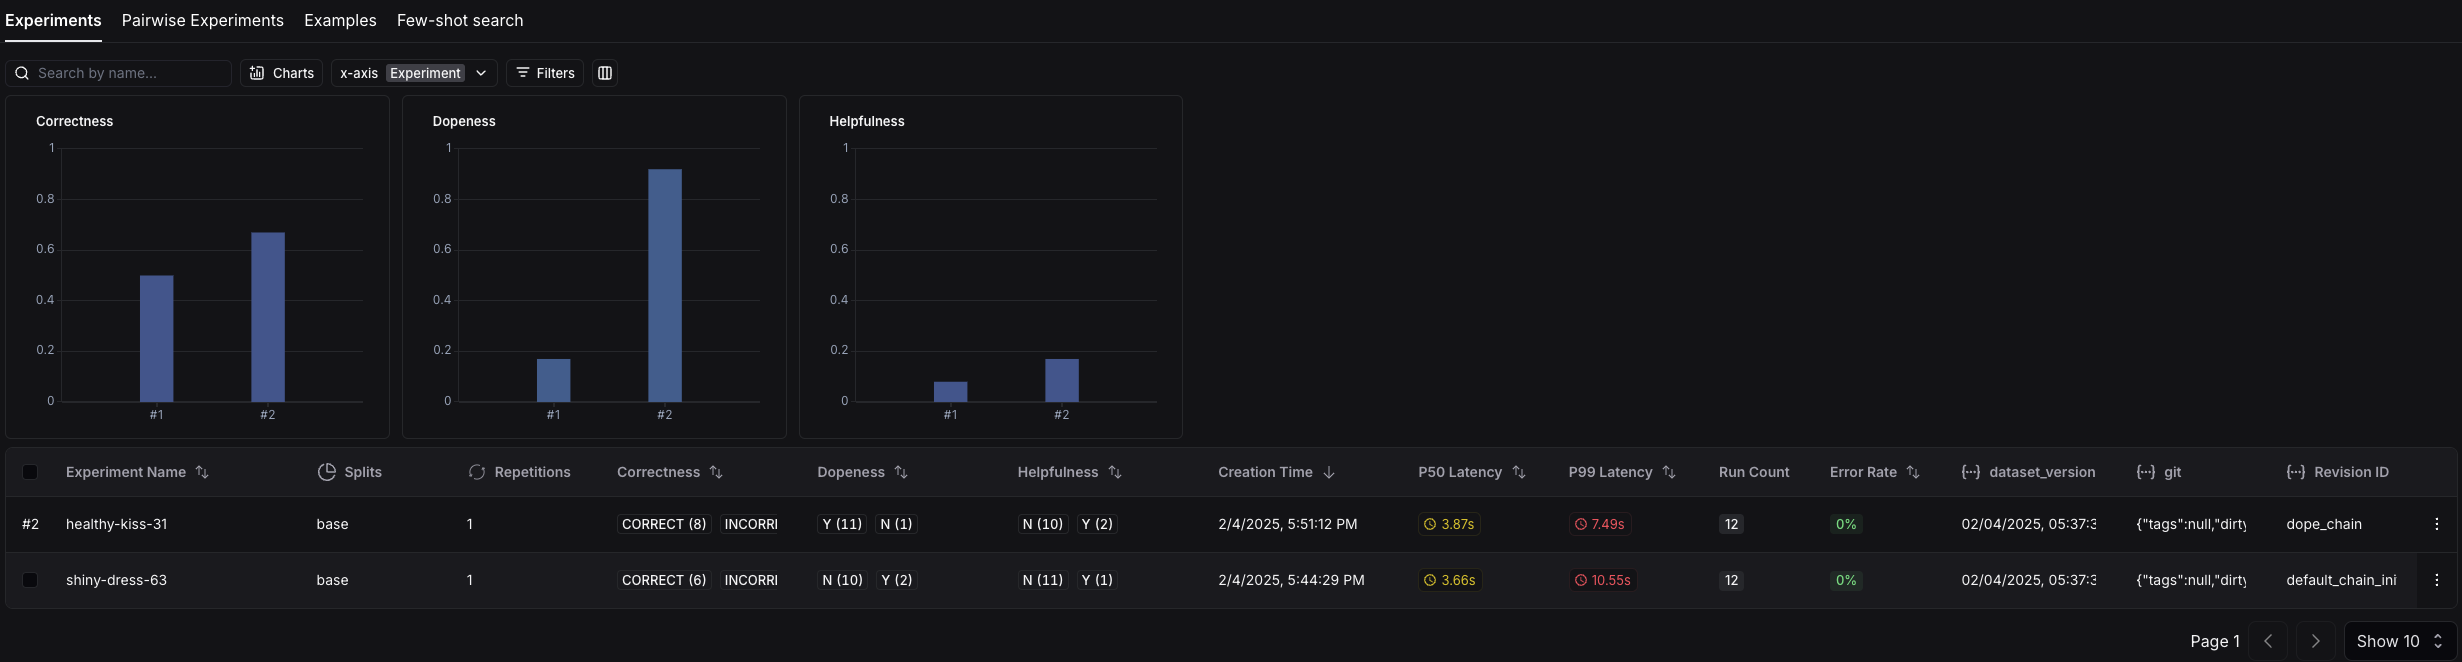

Screenshot 2: Created it while working on HW:<br/>
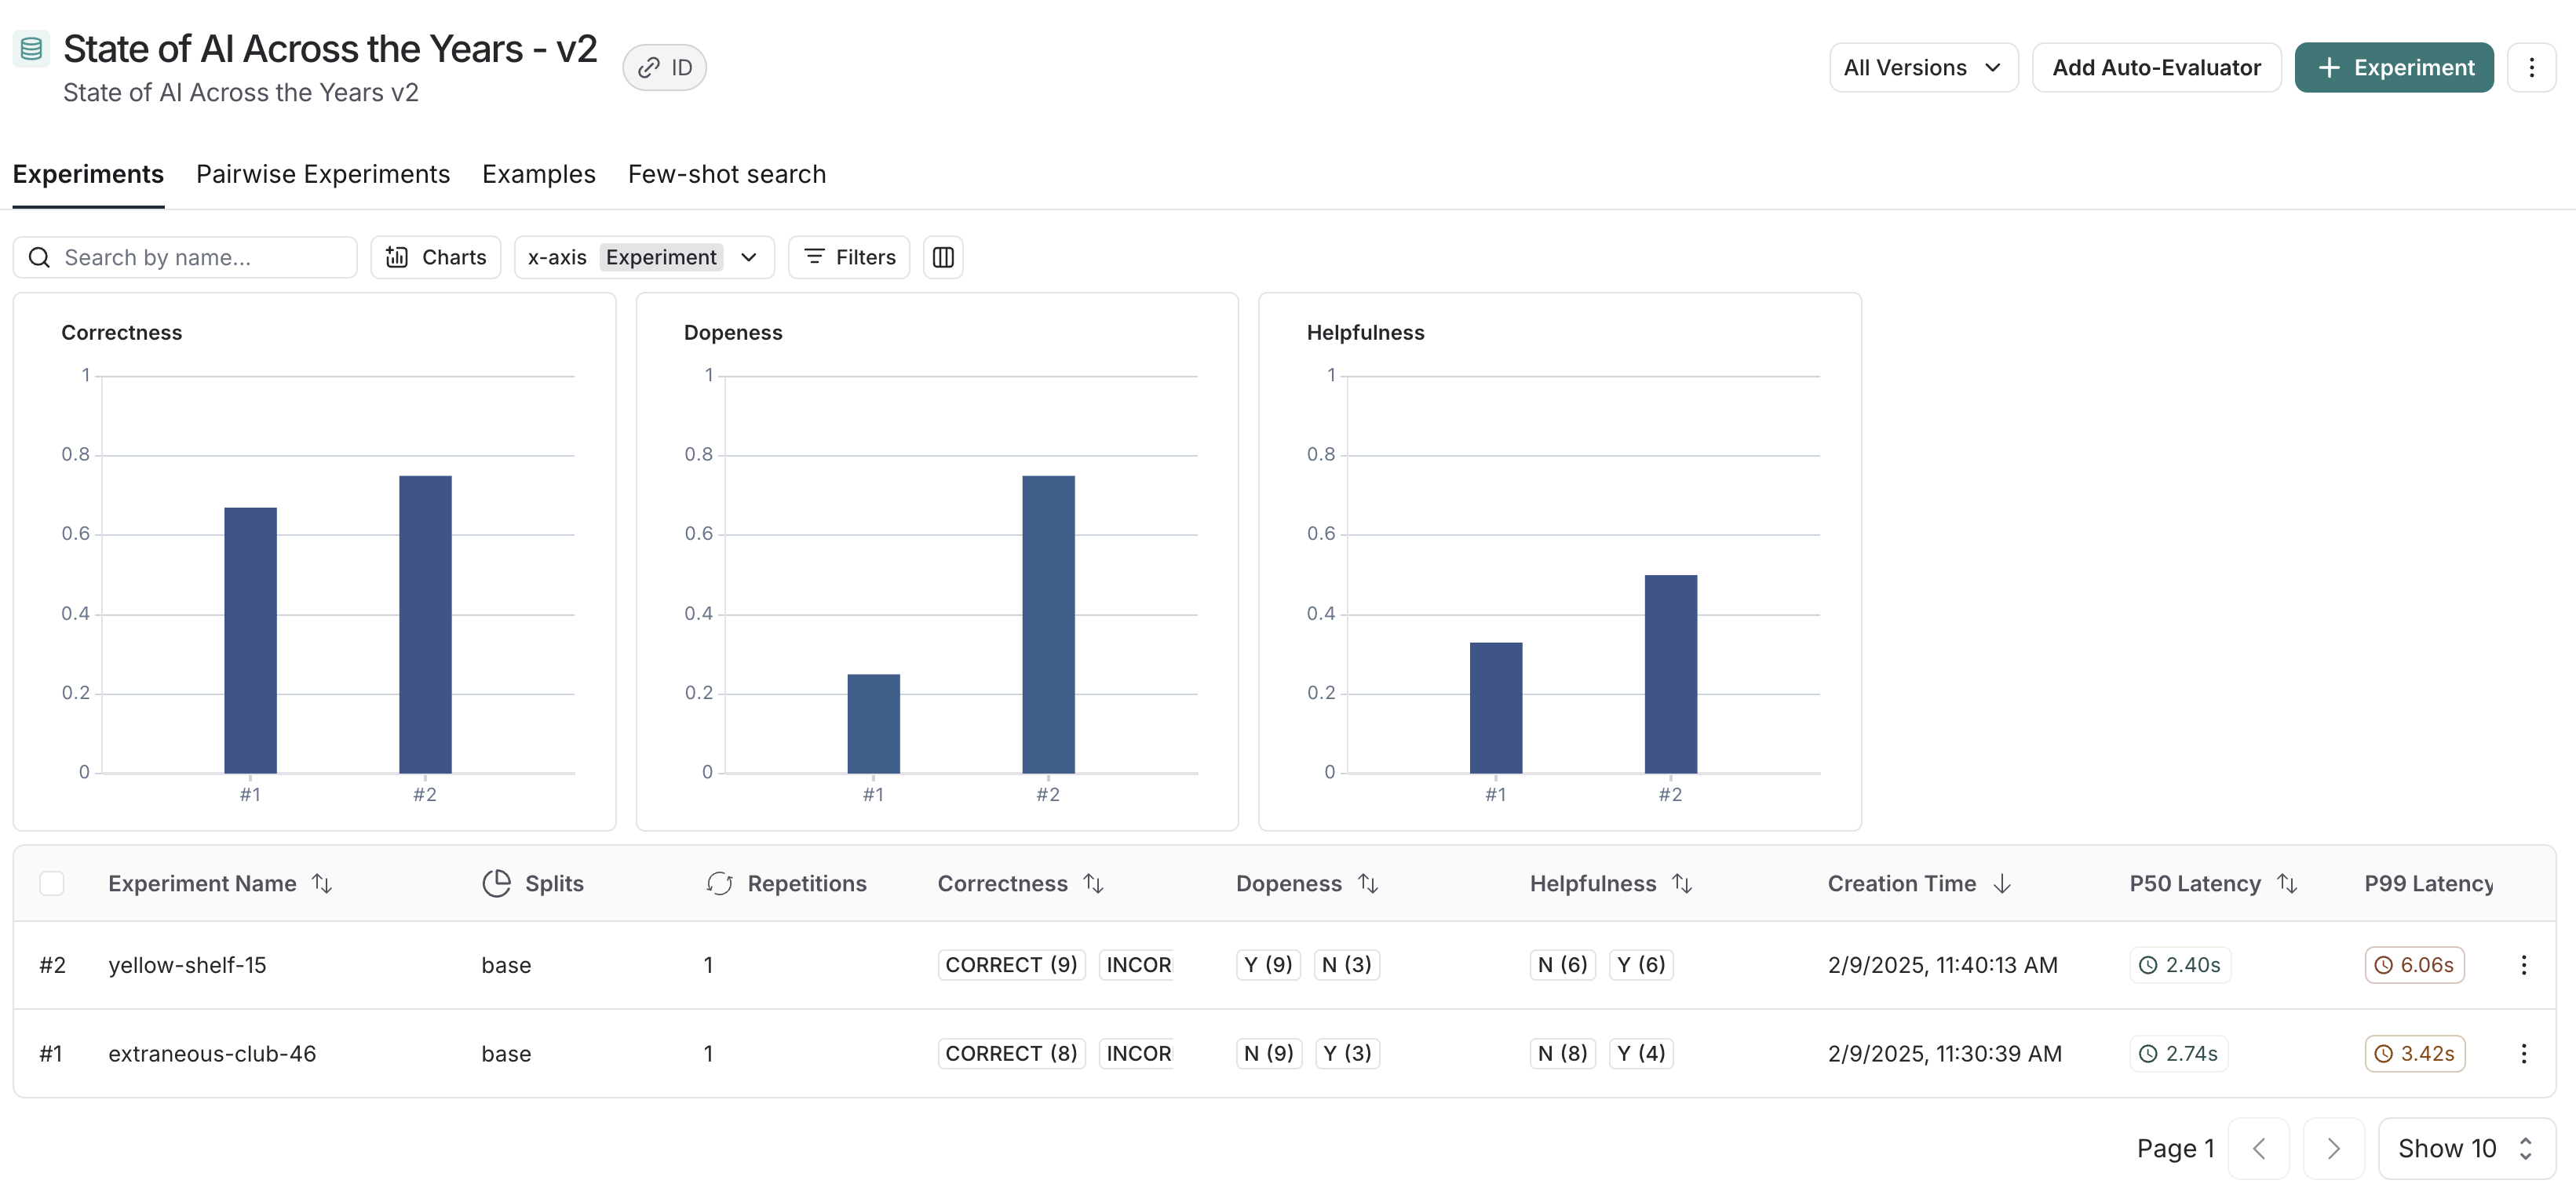



The correctness metric improved because we have increased the chunk and embedding size. This resulted in giving more context for LLM to enable it to give more correct answer. <br/>
The dopeness metric improved due to explictly prompting (i.e. specifing it on the prompt) LLM to give dope responses